In [1]:
import numpy as np
from scipy.optimize import curve_fit
from drude_smith_fit import read_csv, drude_smith_c3, fit_function
from drude_smith_fit import plot_experimental_and_fitted_data
from drude_smith_fit import print_help

In [2]:
print_help()

Usage: python drude_smith_fit.py [input_filename [min_frequency [max_frequency [output_filename]]]]

Fits experimental data to the Drude-Smith model for mobility.


input_filename: The name of the file containing the experimental data. The file should be a CSV file with the first column containing the frequency in Hz, the second column containing the imaginary part of the complex number, and the third column containing the real part of the complex number.
*** UNITS must be cm2 V-1 s-1. ***

min_frequency: The minimum frequency to include in the fit. Default is 0.3 THz.

max_frequency: The maximum frequency to include in the fit. Default is 2.2 THz.

output_filename: The name of the file to save the plot to. Default is 'experimental_and_fitted_data.png'.


In [3]:
filename = "mobility.csv"
min_frequency = 0.3E12
max_frequency = 2.2E12
output_filename = "experimental_and_fitted_data.png"

In [4]:
frequencies, complex_numbers = read_csv(
    filename, min_frequency, max_frequency
)

Fitted value of m: 4.920e-01 +/- 4.852e-02
Fitted value of tau: 3.392e+01 femtoseconds +/- 2.435e+00 femtoseconds
Fitted value of c1: -7.536e-01 +/- 7.665e-03


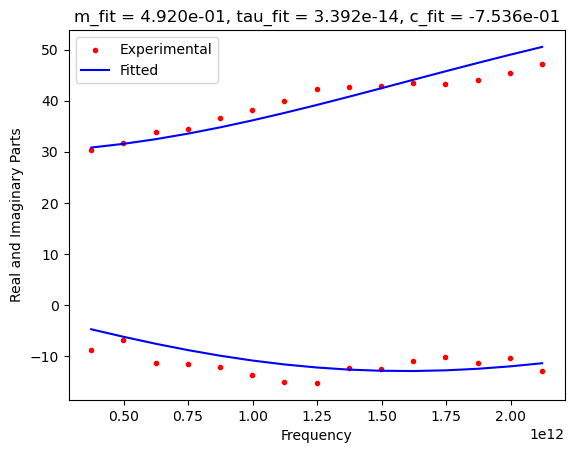

In [5]:
# To fit both the real and imaginary parts of the complex numbers
# create a 'stretched' array
stretched_complex_numbers = np.concatenate(
    (np.real(complex_numbers), np.imag(complex_numbers))
)

# Set some physics boundaries
min_m = 0.  # this helps the fit to converge
max_m = 10.  # this helps the fit to converge
min_c1 = -1.
max_c1 = 0.
min_tau = 0.
max_tau = np.inf

minima = [min_m, min_tau, min_c1]
maxima = [max_m, max_tau, max_c1]

# Perform the fit
params, pcov = curve_fit(
    fit_function, frequencies, stretched_complex_numbers,
    bounds=(minima, maxima)
)
std_dev = np.sqrt(np.diag(pcov))

# Extract the fitted parameters
m_fit, tau_fit, c1_fit = params
print("Fitted value of m:", '{:.3e}'.format(m_fit), "+/-", '{:.3e}'.format(std_dev[0]))
print("Fitted value of tau:", '{:.3e}'.format(tau_fit), 
      "femtoseconds +/-", '{:.3e}'.format(std_dev[1]), 'femtoseconds')  # Convert to femtoseconds
print("Fitted value of c1:", '{:.3e}'.format(c1_fit), "+/-", '{:.3e}'.format(std_dev[2]))

# Use the fitted parameters to calculate the fitted complex numbers
fitted_stretched_complex_numbers = fit_function(
    frequencies, m_fit, tau_fit, c1_fit
)

fitted_complex_numbers = \
    fitted_stretched_complex_numbers[:len(frequencies)] + \
    1j * fitted_stretched_complex_numbers[len(frequencies):]

plot_experimental_and_fitted_data(
    frequencies, complex_numbers, fitted_complex_numbers,
    "m_fit = %.3e, tau_fit = %.3e, c_fit = %.3e"
    % (m_fit, tau_fit * 1E-15, c1_fit),
    output_filename
)  # Convert to femtoseconds